In [3]:
using LinearAlgebra
using PyPlot
using DataFrames
using CSV

In [2]:
PyPlot.svg(true)

true

In [4]:
include("./src/tmat.jl")
include("./src/latt_para.jl")
include("./src/tmat_nlo.jl")

pole_NLO

# Physical setting

In [5]:
# average mass of baryons unit: GeV
mN = (938.272 + 939.566) / 2 
mΣ = (1189.37 + 1192.64 + 1197.45) / 3 
mΛ = 1115.68 
mΞ = (1314.8+1321.3) / 2 

# average mass of mesons unit: MeV
mKbar = (493.68 + 497.65) / 2 
mπ = (139.570*2 + 134.977) / 3
mK = mKbar 
mη = 547.51

a = [-2, -2.0, -2.25, -2.52]
mch = [[mπ, mΣ],[mKbar, mN], [mη, mΛ], [mK, mΞ]]

params = Dict(
    :mch => mch,
    :decons_vec => [92.4, 92.4, 92.4, 92.4] .* 1.123,
    :m_meson => (mπ, mK)
)
params[:threshold] = [sum(mch[i]) for i in 1:4]

4-element Vector{Float64}:
 1331.1923333333334
 1434.584
 1663.19
 1813.715

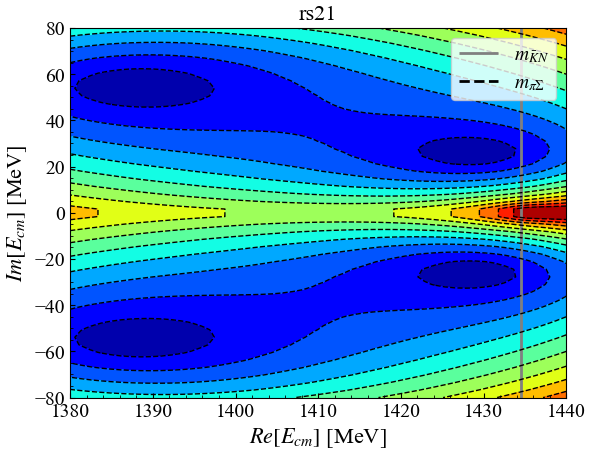

In [6]:
dim = 50
rew = range(1380, 1440, dim)
imw = range(-80, 80, dim)

fig, ax = PyPlot.subplots()
plot_tdet_LO!(ax, rew, imw, params, a, n=2)
gcf()

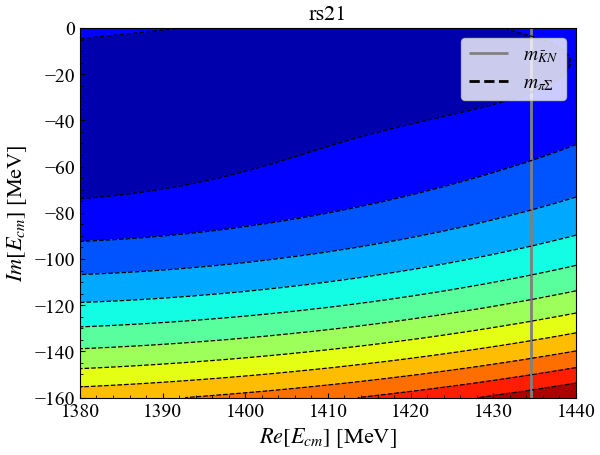

In [6]:
b = Dict(:b0 => -0.43e-3, :bD => 0.08e-3, :bF => -0.27e-3)
d = Dict(:d1 => -0.36e-3, :d2 => 0.09e-3, :d3 => 0.1e-3, :d4 => -0.59e-3)

dim = 50
rew = range(1380, 1440, dim)
imw = range(-160, 0, dim)

fig, ax = PyPlot.subplots()
plot_tdet_NLO(ax, rew, imw, params, a, b, d, n=4, rs="rs21")

gcf()

In [7]:
a2 = [-1.6, -2.2, -2.5, -2.9]
params1 = copy(params)
params1[:decons_vec] = [93.2, 108.2, 1.3*93.2, 108.2]
params1

Dict{Symbol, Any} with 4 entries:
  :m_meson    => (138.039, 495.665)
  :threshold  => [1331.19, 1434.58, 1663.19, 1813.71]
  :decons_vec => [93.2, 108.2, 121.16, 108.2]
  :mch        => [[138.039, 1193.15], [495.665, 938.919], [547.51, 1115.68], [4…

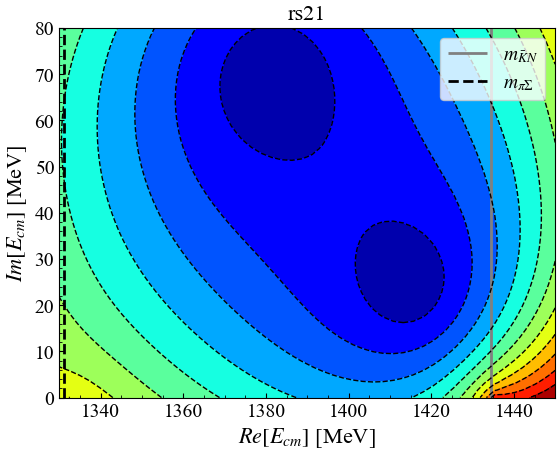

In [8]:
dim = 50
rew = range(1330, 1450, dim)
imw = range(0, 80, dim)

fig, ax = PyPlot.subplots()
plot_tdet_LO!(ax, rew, imw, params1, [-1.6,-2.24], n=2, μ_tuple=(630,))
gcf()

# Guo's result

In [9]:
guo_para = Dict(
    :mch => [(137.3, 1191.6), (495.6, 940.9), (547.9, 1111.5), (495.6, 1322.2) ],
    :decons_vec => [92.4, 112.7, 121.7, 112.7],
    :m_meson => (137.3, 495.6)
)
guo_a = [-0.7, -1.15, -1.21, -1.13]
guo_para[:threshold] = [sum(guo_para[:mch][i]) for i in 1:4]
#guo_para[:decons_vec] = [106.95, 106.95, 106.95, 106.95]
guo_para[:decons_vec] = [109.032, 109.032, 109.032, 109.032]

4-element Vector{Float64}:
 109.032
 109.032
 109.032
 109.032

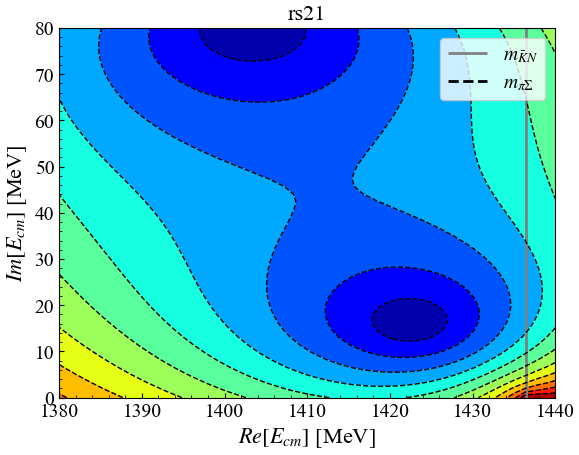

In [10]:
dim = 50
rew = range(1380, 1440, dim)
imw = range(-0, 80, dim)

fig, ax = PyPlot.subplots()
plot_tdet_LO!(ax, rew, imw, guo_para, guo_a, n=4, μ_tuple=(1191.6, 940.9, 1111.5, 1322.2))
gcf()

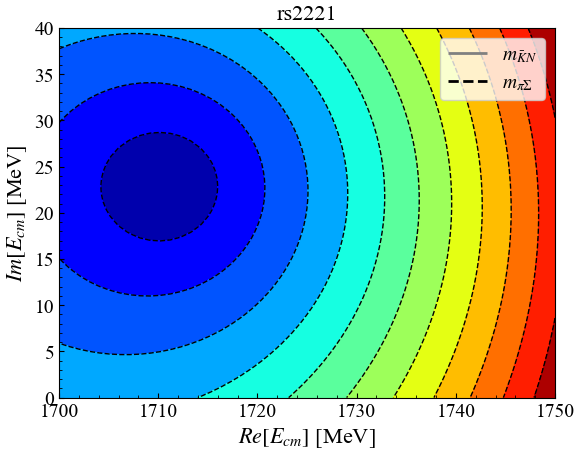

In [11]:
dim = 50
rew = range(1700, 1750, dim)
imw = range(-0, 40, dim)

fig, ax = PyPlot.subplots()
plot_tdet_LO(ax, rew, imw, guo_para, guo_a, n=4, rs="rs2221", μ_tuple=(1191.6, 940.9, 1111.5, 1322.2))
gcf()

In [12]:
pole_NLO([1417e0, -15.7], guo_para, guo_a, b, d, n=4, μ_tuple=(1191.6, 940.9, 1111.5, 1322.2) )

2-element Vector{Float64}:
 1423.98
  -11.2

In [13]:
pole_NLO([1417e0, -150.7], guo_para, guo_a, b, d, n=4, μ_tuple=(1191.6, 940.9, 1111.5, 1322.2) )

2-element Vector{Float64}:
 1380.52
  -58.58

# Hadrons masses from lattice setup

In [14]:
latt_para = lattice_params!()

Dict{Symbol, Any} with 5 entries:
  :m_meson    => (203.655, 486.366)
  :threshold  => [1397.59, 1466.14, 1683.94, 1781.53]
  :decons_vec => [93.1531, 108.23, 119.217, 108.23]
  :L          => 0.0205243
  :mch        => [(203.655, 1193.94), (486.366, 979.777), (551.1, 1132.84), (48…

In [15]:
params = copy(latt_para)
f = 1.1999999988821624
fπ = 93

#params[:decons_vec] = [fπ fπ*f; fπ*f fπ]#[92.4, 92.4, 92.4, 92.4] .* 1.2
params[:decons_vec] = [fπ, 108e0, fπ*1.3, 108e0]

4-element Vector{Float64}:
  93.0
 108.0
 120.9
 108.0

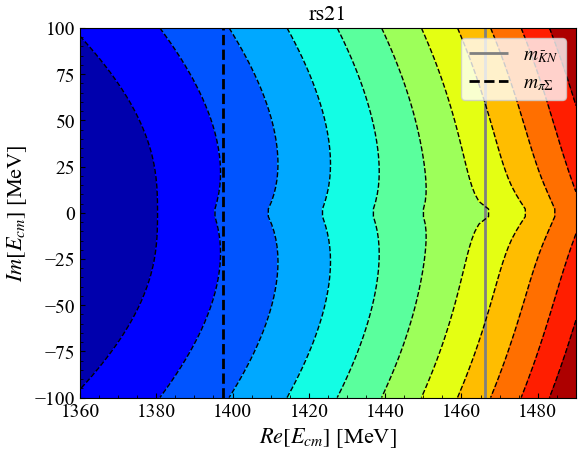

In [17]:
dim = 50
rew = range(1360, 1490, dim)
imw = range(-100, 100, dim)
a = [1.6325762046840782, 1.7138485812778343, -2.9, 24]
fig, ax = PyPlot.subplots()
plot_tdet_LO!(ax, rew, imw, params, a, n=4, μ_tuple=(630e0,), rs="rs21")

gcf()

In [18]:
pole_LO([1460e0, -10], params, a, rs="rs21", n=4)

2-element Vector{Float64}:
 1274.91
    0.0

In [19]:
init_x1 = [1382e0, -45e0]
pole_LO_RS_2ch!(init_x1, params, a)

Row,RS,pole
,String,Any
1,rs11,1111.83-0.0im
2,rs21,1040.44+0.0im
3,rs12,1414.92-0.64im
4,rs22,1039.47+0.0im


In [20]:
init_x2 = [1477e0, -0e0]
pole_LO_RS_2ch!(init_x2, params, a, xtol=1e-9, ftol=1e-8)

Row,RS,pole
,String,Any
1,rs11,1111.83+0.0im
2,rs21,1040.44+0.0im
3,rs12,1414.92-0.64im
4,rs22,1039.47-0.0im


In [22]:

pole_LO(init_x1, params, [-2.2459623242004416,
-1.7668558956537128], rs="rs21", ftol=1e-6, xtol=1e-4)

2-element Vector{Float64}:
 1315.12
   -0.0

In [23]:
latt_para1 = copy(latt_para)
#latt_para1[:decons_vec] = [92.4, 92.4, 92.4, 92.4] .* 1.15

Dict{Symbol, Any} with 5 entries:
  :m_meson    => (203.655, 486.366)
  :threshold  => [1397.59, 1466.14, 1683.94, 1781.53]
  :decons_vec => [93.1531, 108.23, 119.217, 108.23]
  :L          => 0.0205243
  :mch        => [(203.655, 1193.94), (486.366, 979.777), (551.1, 1132.84), (48…

In [24]:
b = Dict(
    :b0 => -0.6208300893256031e-3,
    :bD => 0.0603969112334734e-3,
    :bF => -0.3479468364318576e-3
) 

Dict{Symbol, Float64} with 3 entries:
  :bD => 6.03969e-5
  :bF => -0.000347947
  :b0 => -0.00062083

In [25]:
dd = [
 0.1528504511430132
-0.26938582503269237
-0.06559898593888372
-0.22534174744829905] .* 1e-3

4-element Vector{Float64}:
  0.00015285045114301322
 -0.00026938582503269236
 -6.559898593888372e-5
 -0.00022534174744829905

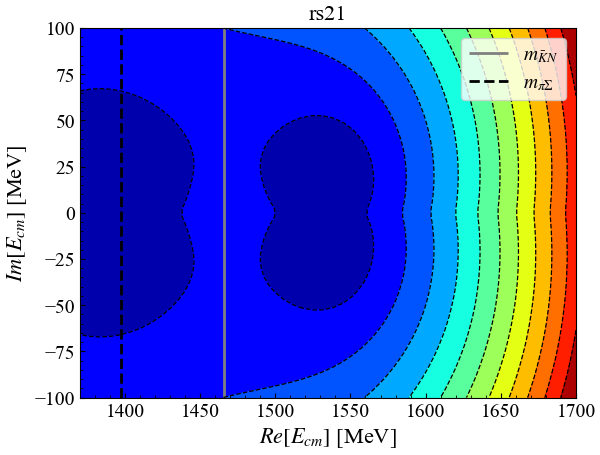

In [30]:
#b = Dict(:b0 => -0.43e-3, :bD => 0.08e-3, :bF => -0.27e-3)

d = Dict(:d1 => dd[1], :d2 => dd[2], :d3 => dd[3], :d4 => dd[4])

dim = 50
rew = range(1370, 1700, dim)
imw = range(-100, 100, dim)

aa2 = [-2.0,
-2.0, -1.8, -2.7]
fig, ax = PyPlot.subplots()
plot_tdet_NLO(ax, rew, imw, latt_para1, aa2, b, d, n=2, rs="rs21")

gcf()